# Assignment: Linear Models
## Foundations of Machine Learning
## Q1 and Q3 were chosen.

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Q1_clean.csv to Q1_clean.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import io

df = pd.read_csv(io.BytesIO(uploaded['Q1_clean.csv']), low_memory=False)
df.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


In [3]:
df.loc[:,['Price','Neighbourhood '] ].groupby('Neighbourhood ').describe()

Price                                                      \
                  count        mean         std   min     25%    50%    75%   
Neighbourhood                                                                 
Bronx             217.0   75.276498   39.755468  10.0   50.00   60.0   90.0   
Brooklyn         8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   
Manhattan       11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0   
Queens           1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0   
Staten Island      96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   

                         
                    max  
Neighbourhood            
Bronx             244.0  
Brooklyn         4500.0  
Manhattan       10000.0  
Queens            950.0  
Staten Island    5000.0

> On average, Manhattan is 183 dollars a night, so Manhatten is the most expensive on average

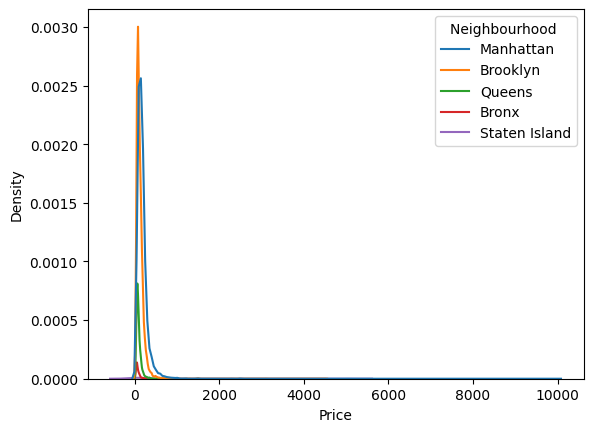

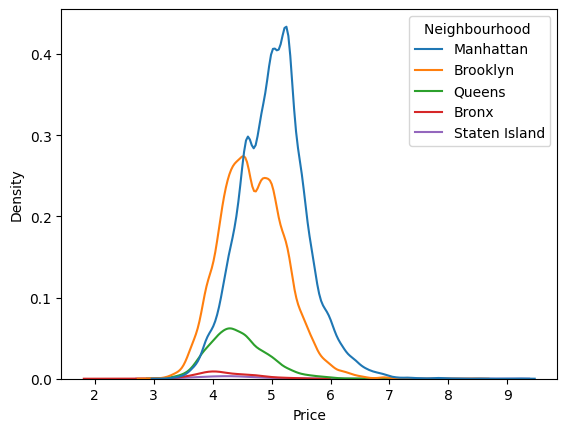

In [4]:
sns.kdeplot(x=df['Price'], hue=df['Neighbourhood '])
plt.show()

sns.kdeplot(x=np.log(df['Price']), hue=df['Neighbourhood '])
plt.show()

2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [5]:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], dtype='int')

from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y) # Run regression

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


> The means from part 1 are the same as the coefficients in this part. The regression is just the group averages, and the regression coefficients are a group mean.

3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [ ]:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], dtype='int', drop_first = True)

from sklearn import linear_model
reg = linear_model.LinearRegression().fit(X,y) # Run regression

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

,variable,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


In [ ]:
print(reg.intercept_)

75.27649769584602


> The Bronx variable was dropped and its coefficient value became the intercept. The coefficients are the previous coefficients from part 2 with the Bronx's coefficient subtracted from them (Mahatten's coefficient became 108 but was 183 before, the difference is 75 which is the Bronx's coefficient).

In [6]:
results = pd.DataFrame({'variable':reg.feature_names_in_,
                        'coefficient': reg.coef_+reg.intercept_}) # Regression coefficients
results

,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

In [7]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood '] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

Z_train = pd.concat([X_train['Review Scores Rating'],
                     pd.get_dummies(X_train['Neighbourhood '], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.06701086106947296
RMSE:  125.01092061382933


,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


> The coefficient on Review Scores Rating is 1.032257. The most expensive property you can rent is a 100-rated place in Manhattan for about 192.65 per night.

5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Room Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

In [9]:
y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood ', 'Room Type'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

Z_train = pd.concat([X_train['Review Scores Rating'],
                    pd.get_dummies(X_train['Neighbourhood '], dtype='int'),
                    pd.get_dummies(X_train['Room Type'], dtype='int')],
                    axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int'),
                    pd.get_dummies(X_test['Room Type'], dtype='int')],
                    axis = 1)
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.22035348129282306
RMSE:  114.27692123130633


,variable,coefficient
0,Review Scores Rating,0.626912
1,Bronx,-13.022765
2,Brooklyn,10.378456
3,Manhattan,53.693304
4,Queens,-6.833330
5,Staten Island,50.003022
6,Entire home/apt,110.617820
7,Private room,3.101341
8,Shared room,-19.500474


> The coefficient on Review Scores Rating is 0.626912. A 100-rated Entire home/apt in Manhattan is the most expensive kind of property at around 170.57 a night.

6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.

> In part 4, the coefficient was 1.03 and in part 5, it was 0.63. In multiple linear regression, imagine regressing your $y$ and $x$ of interest on all other variables, saving the residuals, and then regressing these residuals on each other. The difference between part 4 and part 5 was including the room type in the later. The variation in prices by rating and neighbourhood is explained by the room types available in those neighbourhoods. Once we account for room type, other variables lose predictive strength due to their correlation with it, causing the rating coefficient to shrink.

**Q3.** The is a question about regression using linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.

In [10]:
from google.colab import files
uploaded2 = files.upload()

Saving wages_hw.csv to wages_hw.csv


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(io.BytesIO(uploaded2['wages_hw.csv']), low_memory=False)
df = df.drop(['Unnamed: 0'],axis=1)
df['Intercept'] = np.ones(df.shape[0])
print( np.sum(df.isnull()))

Rating        0
Size          0
Sector        0
avg_salary    0
job_state     0
Intercept     0
dtype: int64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [12]:
df['Sector'] = df['Sector'].str.replace('-1','Missing')

In [13]:
df.head()

,Rating,Size,Sector,avg_salary,job_state,Intercept
0,3.8,501 to 1000 employees,Aerospace & Defense,72.0,NM,1.0
1,3.4,10000+ employees,Health Care,87.5,MD,1.0
2,4.8,501 to 1000 employees,Business Services,85.0,FL,1.0
3,3.8,1001 to 5000 employees,"Oil, Gas, Energy & Utilities",76.5,WA,1.0
4,2.9,51 to 200 employees,Business Services,114.5,NY,1.0


In [14]:
df.describe()

,Rating,avg_salary,Intercept
count,731.000000,731.000000,731.0
mean,3.688372,100.090971,1.0
std,0.570353,38.537585,0.0
min,1.900000,13.500000,1.0
25%,3.300000,73.000000,1.0
50%,3.700000,96.500000,1.0
75%,4.000000,122.500000,1.0
max,5.000000,254.000000,1.0


<Axes: >

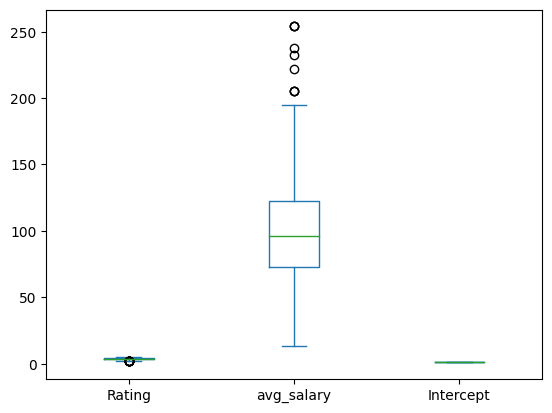

In [15]:
df.plot.box()

In [16]:
tab = df['Sector'].value_counts()

In [17]:
np.random.seed(1000)

N = df.shape[0]
train_size = int(.8*N)

index = np.arange(N)
np.random.shuffle(index)

train_rows = index[:train_size]
test_rows = index[train_size:]

y = df['avg_salary']
y_train = y.iloc[train_rows]
y_test = y.iloc[test_rows]

  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set?

In [18]:
from sklearn import linear_model

dummies = pd.get_dummies( df.loc[:,'Sector'], dtype=int)
X_train = dummies.iloc[train_rows,:]
X_test = dummies.iloc[test_rows,:]
#
reg = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train) # Run regression

# Extract wage dummies
rdf = pd.DataFrame({'variable': reg.feature_names_in_, 'slope':reg.coef_})
rdf.sort_values(by='slope',axis=0)

,variable,slope
6,"Construction, Repair & Maintenance",26.500000
3,"Arts, Entertainment & Recreation",48.500000
11,Health Care,68.837500
24,Travel & Tourism,70.142857
19,"Oil, Gas, Energy & Utilities",78.181818
18,Non-Profit,79.700000
2,Agriculture & Forestry,80.500000
14,Manufacturing,80.537037
10,Government,86.055556
5,Business Services,96.239726


> Media, Telecommunications, Accounting & Legal, Information Technology, and Biotech and Pharmaceuticals have the highest values.

In [19]:
# Rsq and RMSE
y_hat = reg.predict(X_test)
print('Rsq: ', reg.score(X_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ) )
print('RMSE: ', rmse)

Rsq:  0.10786156021224103
RMSE:  31.81255349338017


  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?

<Axes: xlabel='Rating', ylabel='avg_salary'>

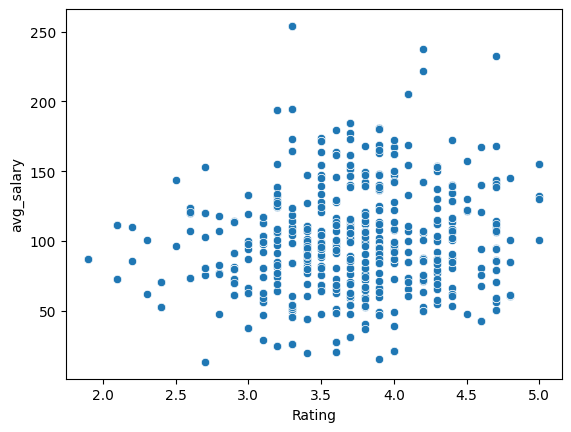

In [20]:
sns.scatterplot(data=df,x='Rating',y='avg_salary')

> There is no obvious relationship between the two variables

In [22]:
from sklearn import linear_model

X_train = df.loc[train_rows,['Intercept','Rating'] ]
X_test = df.loc[test_rows,['Intercept','Rating'] ]

reg = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train) # Run regression

# Rsq and RMSE
X_test = df.loc[test_rows, ['Intercept','Rating'] ]
print('Rsq: ', reg.score(X_test,y_test)) # R2
y_hat = reg.predict(X_test)
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

fx_num = reg.coef_[0] + reg.coef_[1]*np.arange(2,6,1)
gdf1 = pd.DataFrame({'Rating':np.arange(2,6,1),'Effect':fx_num,'Version':'Numeric'})

rdf = pd.DataFrame({'variable': reg.feature_names_in_, 'slope':reg.coef_})
rdf.sort_values(by='slope',axis=0)


Rsq:  0.0012158997447975217
RMSE:  33.660317944994524


,variable,slope
1,Rating,9.461627
0,Intercept,65.851291


> Higher ratings predict higher salaries: for each rating above 0, the salary goes up by $9,500 roughly.

In [23]:
# Let's one-hot encode the ratings
df['Rating_rnd'] = df['Rating'].round()

X_train = df.loc[train_rows,['Rating_rnd'] ]
dummies_train = pd.get_dummies(X_train['Rating_rnd'],dtype=int)

reg = linear_model.LinearRegression(fit_intercept=False).fit(dummies_train,y_train) # Run regression

# Rsq and RMSE
X_test = df.loc[test_rows,['Rating_rnd'] ]
dummies_test = pd.get_dummies(X_test['Rating_rnd'],dtype=int)
y_hat = reg.predict(dummies_test)

print('Rsq: ', reg.score(dummies_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

rdf = pd.DataFrame({'variable': dummies_train.columns, 'slope':reg.coef_})
rdf

Rsq:  -0.003408188834975734
RMSE:  33.73814685499916


,variable,slope
0,2.0,81.735294
1,3.0,95.054878
2,4.0,104.227528
3,5.0,102.457447


<Axes: xlabel='Rating', ylabel='Effect'>

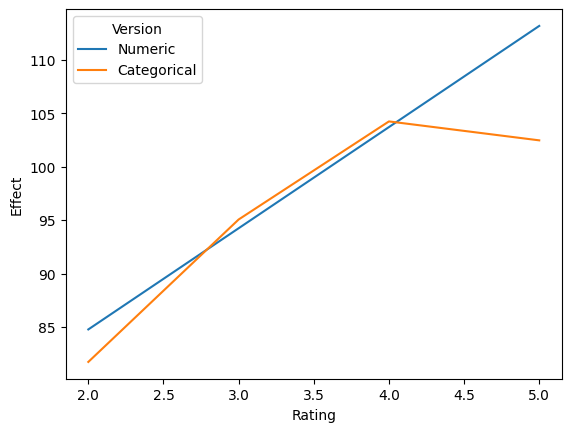

In [ ]:
gdf2 = pd.DataFrame({'Rating':np.arange(2,6,1),'Effect':reg.coef_,'Version':'Categorical'})
gdf =  pd.concat([gdf1,gdf2],axis=0)
sns.lineplot(data=gdf,x='Rating',y='Effect',hue='Version')

> The dummy regression lets us see each rating as a "step" instead of a slope that encompasses all of the ratings.

> The RMSE is higher and the Rsq is lower for this part. It is important to note that the Rsq is negative which is due to the mean of the training data was a better predictor than the dummies.

> It's interesting that going from a rating of 4 to 5 is actually lower, which might be explained by the wage going down in exchange for a better work environment

  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?

In [24]:
df['SxR'] = df.loc[:,'Sector'] + 'X' + df.loc[:,'Rating_rnd'].astype(str)
dummies = pd.get_dummies(df.loc[:,'SxR'], dtype=int )

# Fit linear model
dummies_train = dummies.iloc[train_rows,:]
reg = linear_model.LinearRegression(fit_intercept=False).fit(dummies_train,y_train) # Run regression
rdf = pd.DataFrame({'variable': dummies_train.columns, 'slope':reg.coef_})
print(rdf.sort_values(by='slope',axis=0).to_string())

                                  variable       slope
14  Construction, Repair & MaintenanceX3.0   26.500000
47                  TelecommunicationsX3.0   44.000000
39                          Non-ProfitX3.0   47.500000
5     Arts, Entertainment & RecreationX4.0   48.500000
31                       ManufacturingX2.0   52.500000
20                             FinanceX5.0   56.750000
24                         Health CareX4.0   58.413043
51                    Travel & TourismX4.0   70.142857
41        Oil, Gas, Energy & UtilitiesX4.0   78.181818
4               Agriculture & ForestryX5.0   80.500000
23                         Health CareX3.0   82.941176
21                          GovernmentX3.0   83.928571
3                  Aerospace & DefenseX5.0   84.357143
32                       ManufacturingX3.0   84.794118
18                             FinanceX3.0   86.625000
44                              RetailX2.0   86.833333
33                       ManufacturingX4.0   87.166667
7         

In [25]:
dummies_test = dummies.iloc[test_rows,:]
y_hat = reg.predict(dummies_test)
print('Rsq: ', reg.score(dummies_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

Rsq:  0.23491600794936895
RMSE:  29.46028618802498


> Compared to part 2, the Rsq is higher and the RMSE is lower. The coefficients are now for each sector so we can now see which sector-rating pairs have which salaries. Telecomunications with a rating of 4, Biotech & Pharmaceuticals with a rating of 5, and Media with a rating of 4 have the highest wages.